In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime_data = pd.read_csv('Cleaned_df.csv')
data_crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crime_data.head()

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Weapon Used,Year,Month,Year_Month
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,1,2020-01
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,1,2020-01
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,0,2020,2,2020-02
3,191501505,2020-01-01,2020-01-01 17:30:00,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,0,2020,1,2020-01
4,191921269,2020-01-01,2020-01-01 04:15:00,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,0,2020,1,2020-01


### Visualize overall crime trends from 2020 to the present year.

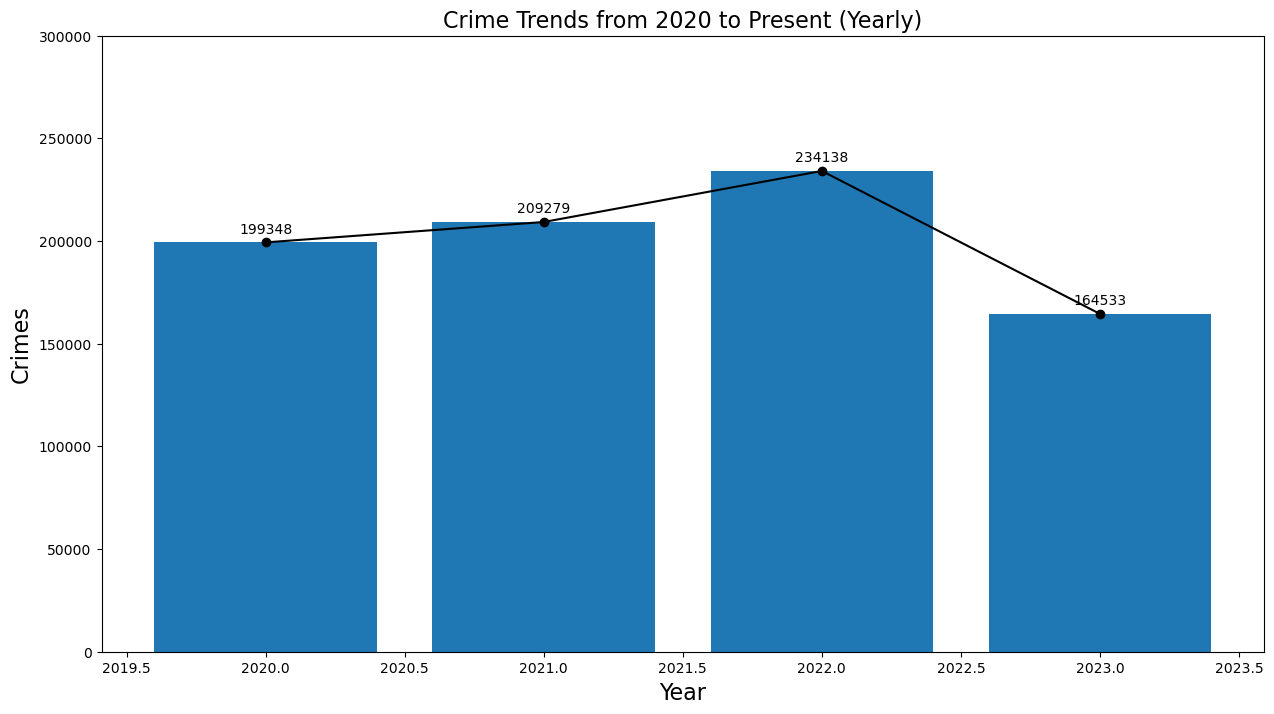

In [3]:
# Displaying yearly crime count over the years
yearly_crime_counts = crime_data.groupby('Year').size().reset_index(name='Crime Counts')

plt.figure(figsize=(15, 8))
bars = plt.bar(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts'])
plt.ylim(0, 300000)

plt.plot(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts'], color='black', marker='o')

for x, y in zip(yearly_crime_counts['Year'], yearly_crime_counts['Crime Counts']):
    plt.text(x, y + 0.01 * 300000, f'{y}', ha='center', va='bottom')

plt.title('Crime Trends from 2020 to Present (Yearly)', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Crimes', fontsize = 16)
# plt.grid(axis='y')
plt.show()

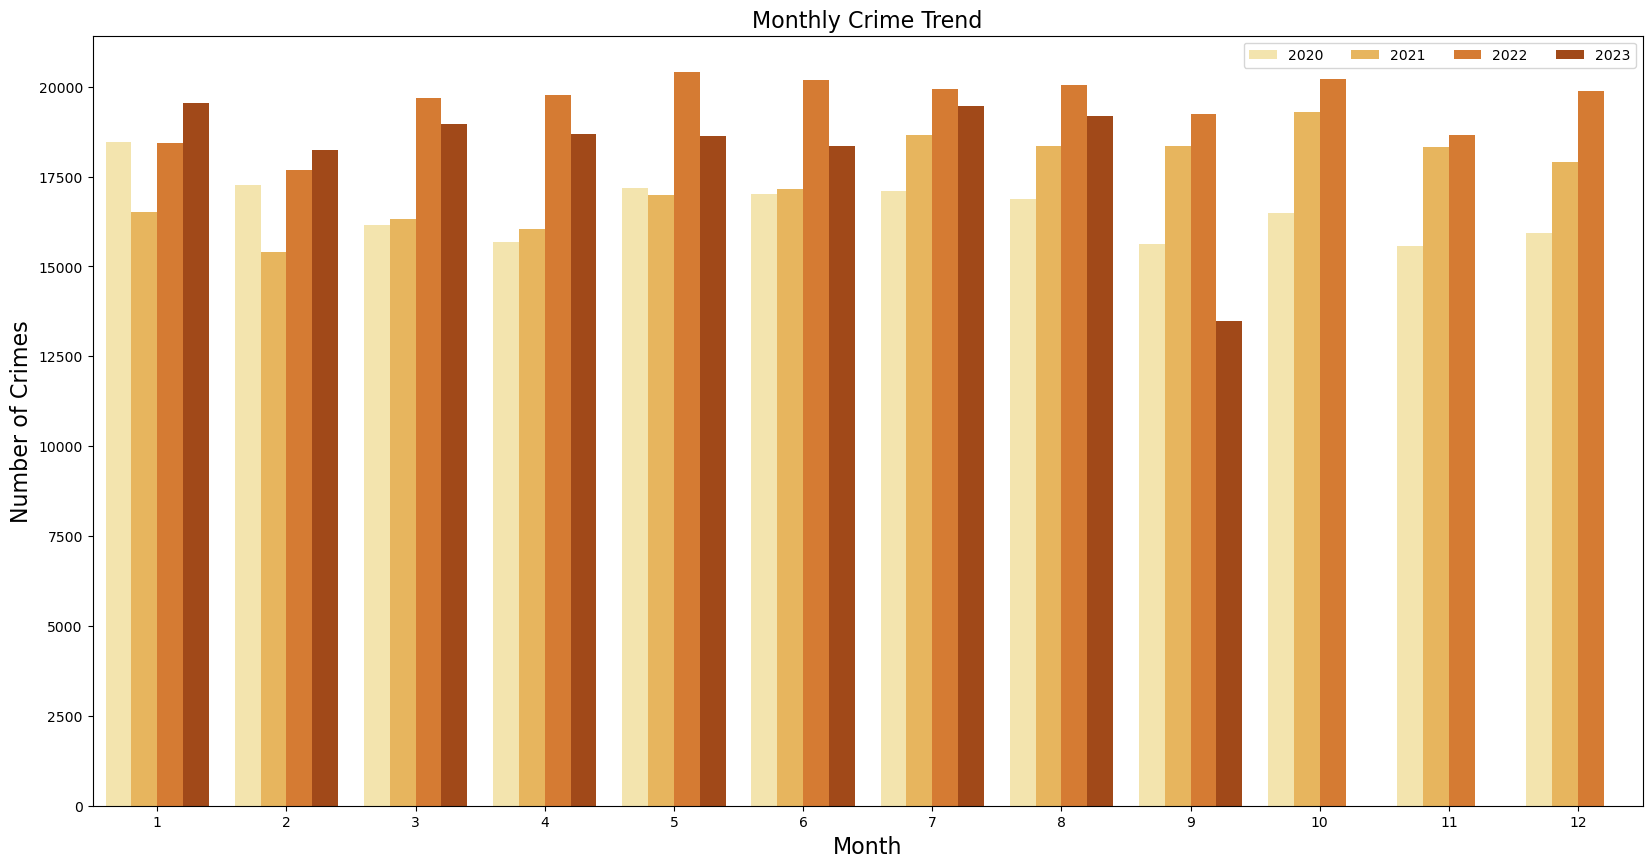

In [4]:
# Displaying monthly crime trends
plt.figure(figsize=(20,10))
sns.countplot(data=crime_data, x='Month', hue='Year', palette='YlOrBr')
plt.title('Monthly Crime Trend',fontsize = 16)
plt.legend(ncol = 4) 
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.show()

### Analyze and visualize seasonal patterns in crime data.

In [5]:
# Grouping the monthly average crime
monthly_avg = crime_data.groupby(crime_data['Month']).size()

In [6]:
# Displaying Descriptive Statistics for Monthly crime
print("Descriptive Statistics for Monthly Crimes:")
print(monthly_avg.describe())

Descriptive Statistics for Monthly Crimes:
count       12.000000
mean     67274.833333
std       8338.348756
min      52530.000000
25%      64021.250000
50%      70639.000000
75%      73027.750000
max      75168.000000
dtype: float64


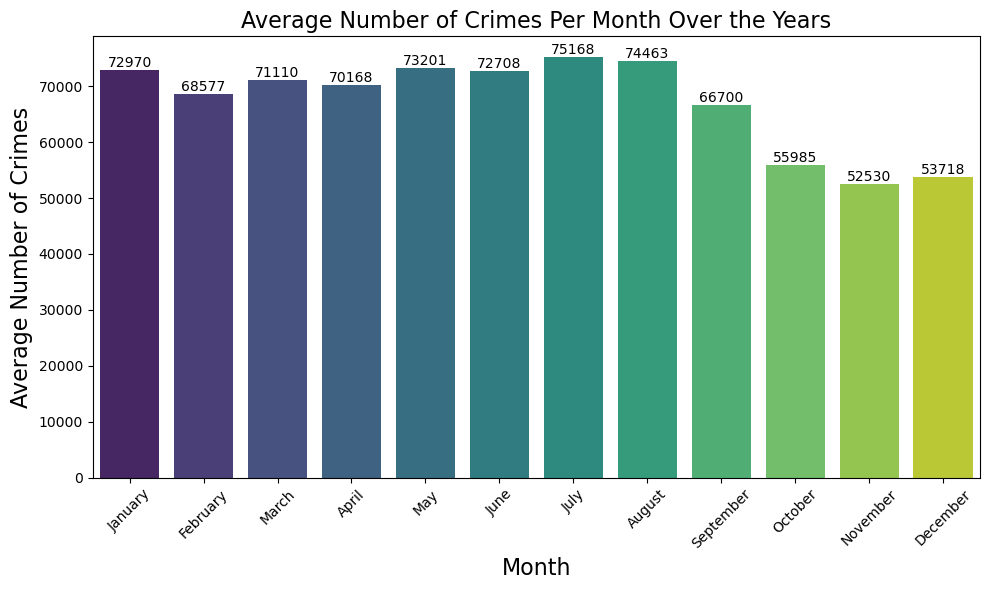

In [7]:
# Displaying Average number of crimes per month over the years
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=monthly_avg.reset_index(), x='Month', y=0, palette='viridis')
plt.title('Average Number of Crimes Per Month Over the Years', fontsize = 16)
plt.ylabel('Average Number of Crimes', fontsize = 16)
plt.xlabel('Month', fontsize = 16)
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 
                                    'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### Identify the most common type of crime and its trends over time.

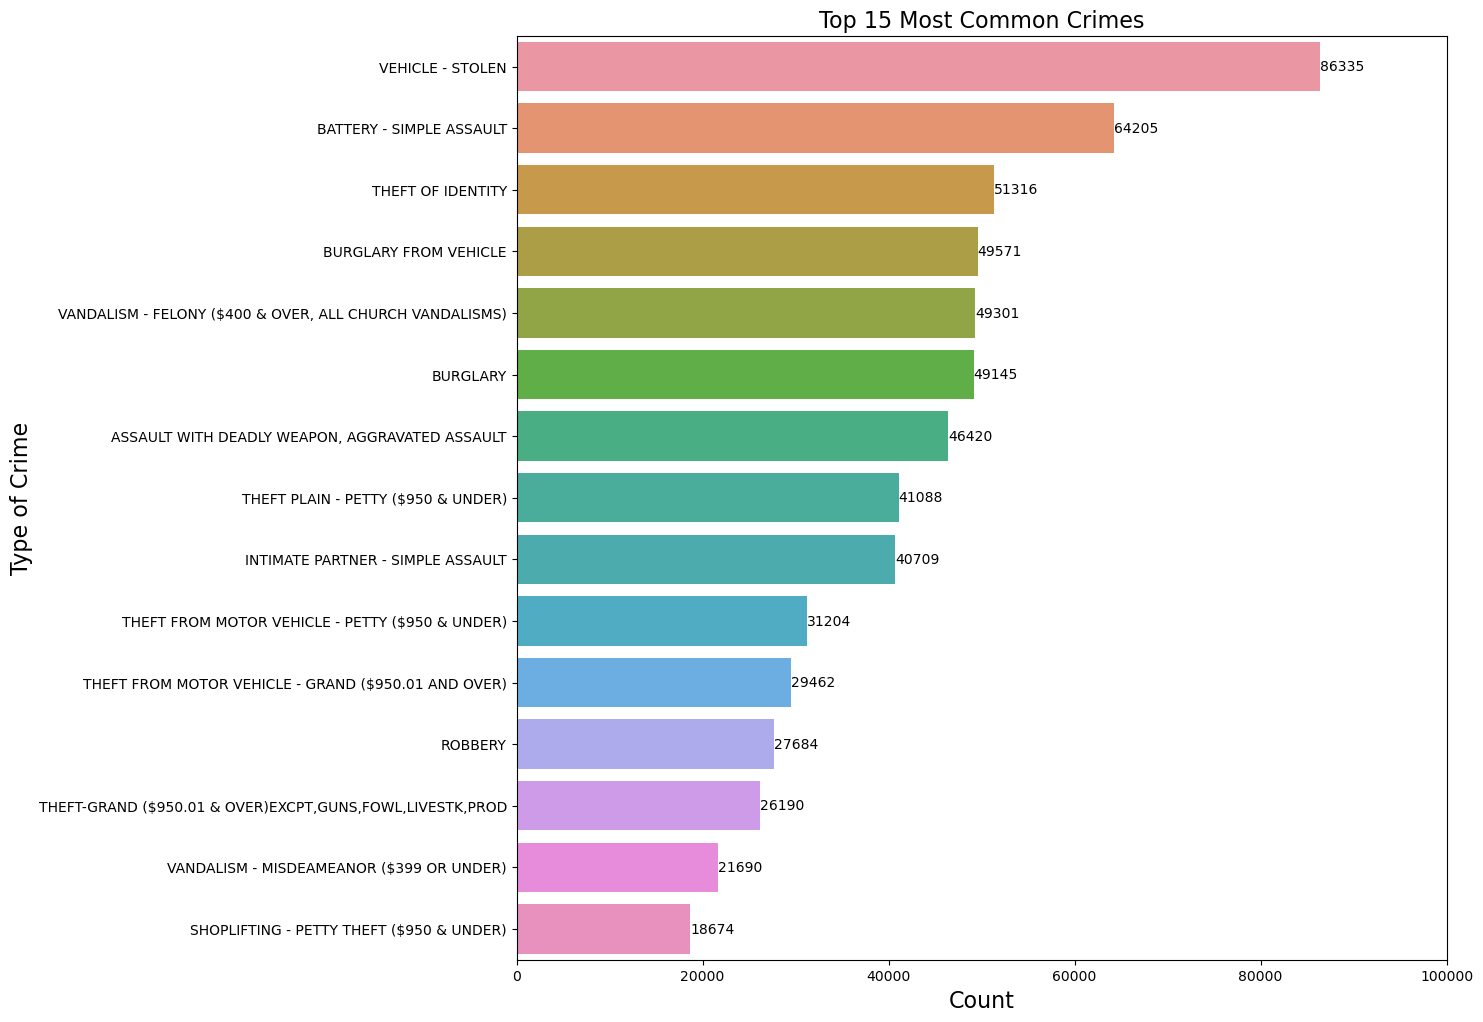

In [8]:
# Displaying most common type of crimes
plt.figure(figsize=(12, 12))

top_crimes = crime_data['Crm Cd Desc'].value_counts().nlargest(15)

crime_plot = sns.countplot(data=crime_data, y='Crm Cd Desc',order=top_crimes.index)

plt.title('Top 15 Most Common Crimes', fontsize = 16)
plt.xlabel('Count', fontsize = 16)
plt.ylabel('Type of Crime', fontsize = 16)
plt.xlim(0, 100000)

for bar in crime_plot.patches:
    plt.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}', 
        va='center'
    )
plt.show()

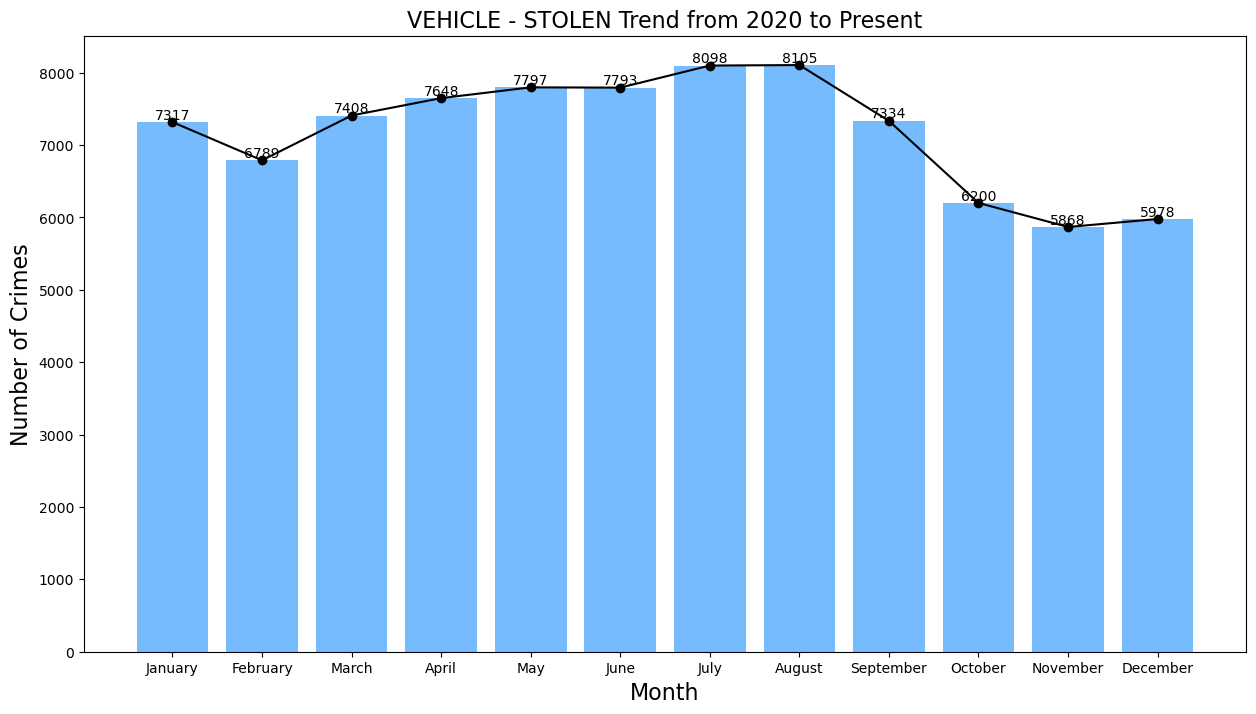

In [9]:
# Displaying Top crime trend over the years
top_crime = crime_data['Crm Cd Desc'].value_counts().index[0]

filtered_data = crime_data[crime_data['Crm Cd Desc'] == top_crime]

monthly_trend = filtered_data.groupby('Month').size().reset_index(name='Counts')

monthly_trend.sort_values('Month', inplace=True)

monthly_trend['Month'] = monthly_trend['Month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(15, 8))
bars = plt.bar(monthly_trend['Month'], monthly_trend['Counts'], color='xkcd:sky blue')
plt.plot(monthly_trend['Month'], monthly_trend['Counts'], color='black', marker='o')

for x, y in zip(monthly_trend['Month'], monthly_trend['Counts']):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

plt.title(f'{top_crime} Trend from 2020 to Present', fontsize = 16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.show()

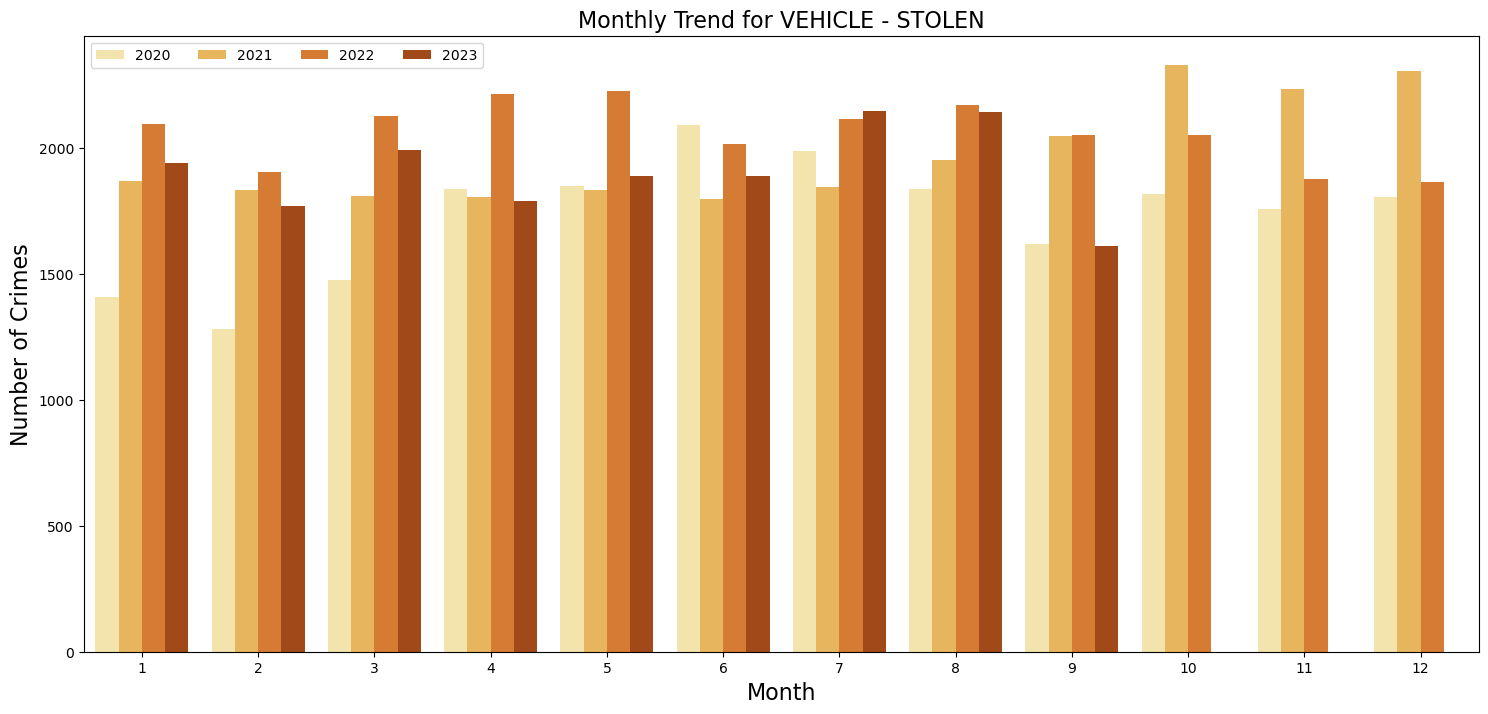

In [10]:
#Monthly Trend for Vehicle - Stolen
top_crime = crime_data['Crm Cd Desc'].value_counts().index[0]
filtered_data = crime_data[crime_data['Crm Cd Desc'] == top_crime]
plt.figure(figsize=(18, 8))
sns.countplot(data=filtered_data, x='Month', hue='Year', palette='YlOrBr')
plt.title(f'Monthly Trend for {top_crime}', fontsize = 16)
plt.legend(ncol = 4) 
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.show()

### Investigate if there are any notable differences in crime rates between regions or cities

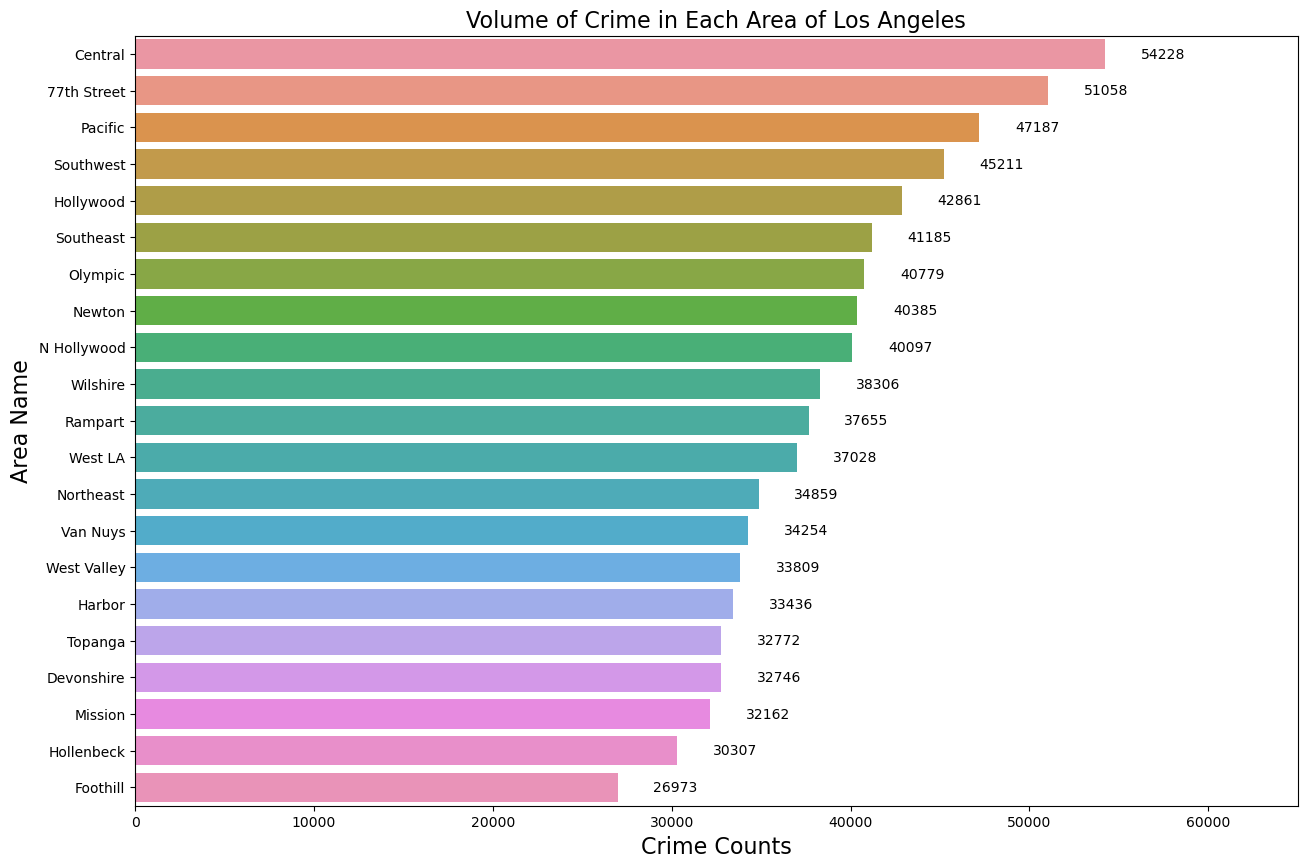

In [11]:
# Displaying any notable differences in crime rates between regions or cities
plt.figure(figsize=(15, 10))

order = crime_data['AREA NAME'].value_counts().index
sns.countplot(y='AREA NAME', data=crime_data, order=order)

plt.xlabel('Crime Counts', fontsize = 16)
plt.ylabel('Area Name', fontsize = 16)
plt.title('Volume of Crime in Each Area of Los Angeles', fontsize = 16)
plt.xlim(0,65000)

# Adding the count at the end of each bar
for bar in plt.gca().patches:
    plt.text(bar.get_width() + 2000,  # Adding 2000 to move the text slightly right
             bar.get_y() + bar.get_height()/2, 
             str(int(bar.get_width())),
             va="center")

plt.show()

In [12]:
# Calculating Crime statistics based on area name
statistics = crime_data['AREA NAME'].value_counts().describe()
print(statistics)

count       21.000000
mean     38442.761905
std       6895.542763
min      26973.000000
25%      33436.000000
50%      37655.000000
75%      41185.000000
max      54228.000000
Name: AREA NAME, dtype: float64


### Analyze the relationship between the day of the week and the frequency of certain types of crimes.

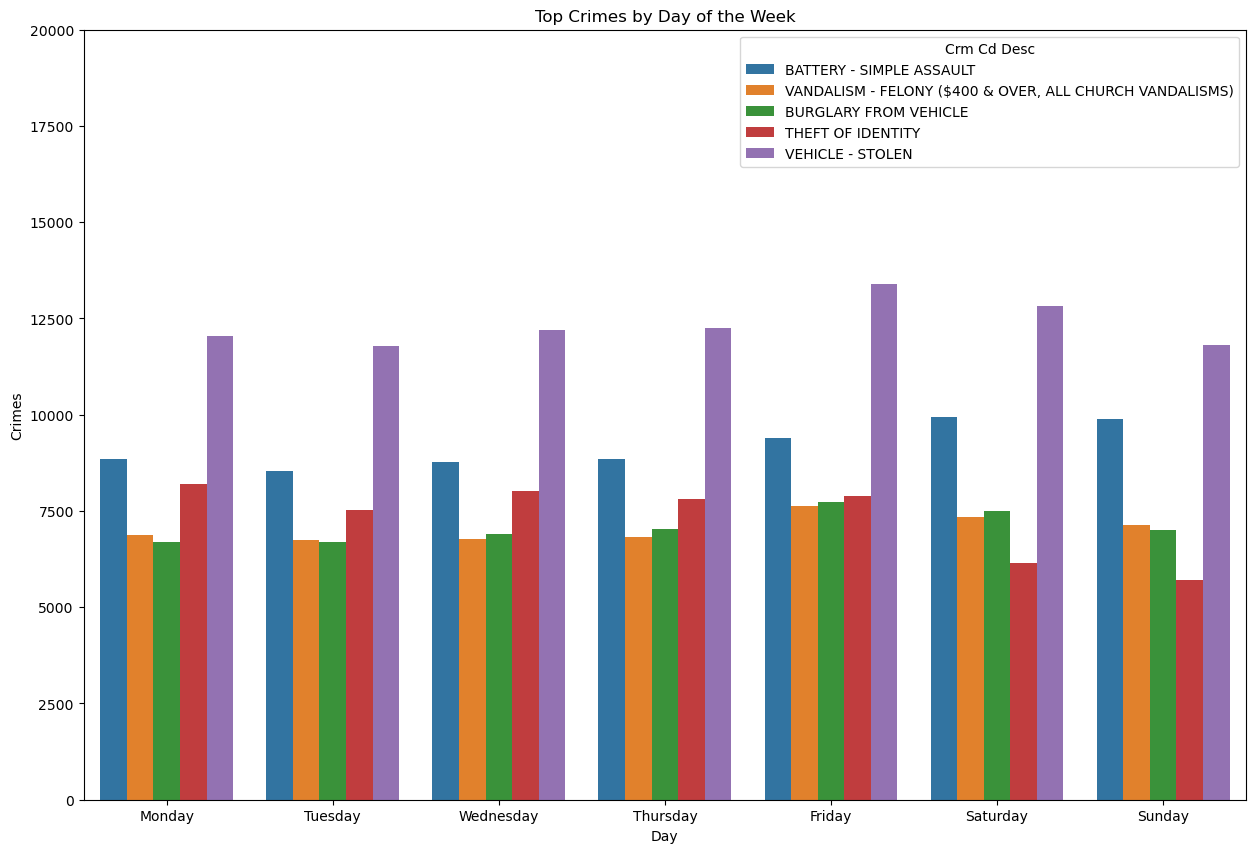

In [13]:
# Displaying relationship between the day of the week and the frequency of certain types of crimes.
crime_data['Date Time OCC'] = pd.to_datetime(crime_data['Date Time OCC'])
crime_data['DayOfWeek'] = crime_data['Date Time OCC'].dt.day_name()
top_crimes = crime_data['Crm Cd Desc'].value_counts().index[:5]
filtered_df = crime_data[crime_data['Crm Cd Desc'].isin(top_crimes)]

order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15, 10))
sns.countplot(x='DayOfWeek', hue='Crm Cd Desc', data=filtered_df, order=order_days)
plt.title('Top Crimes by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Crimes')
plt.ylim(0, 20000)
plt.show()

### Impact of Major Events

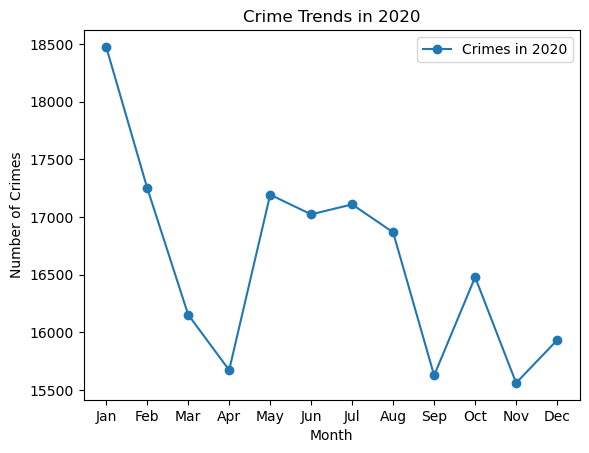

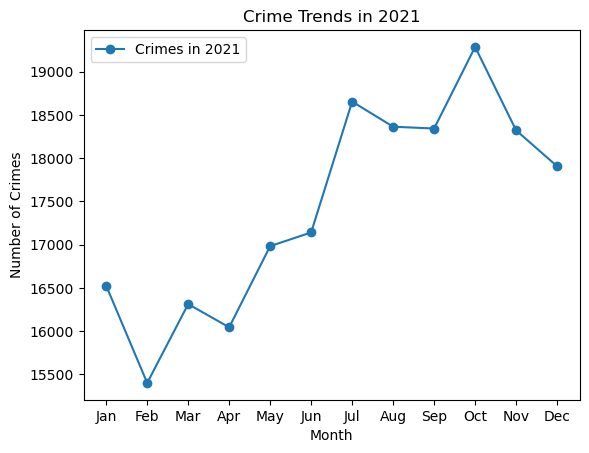

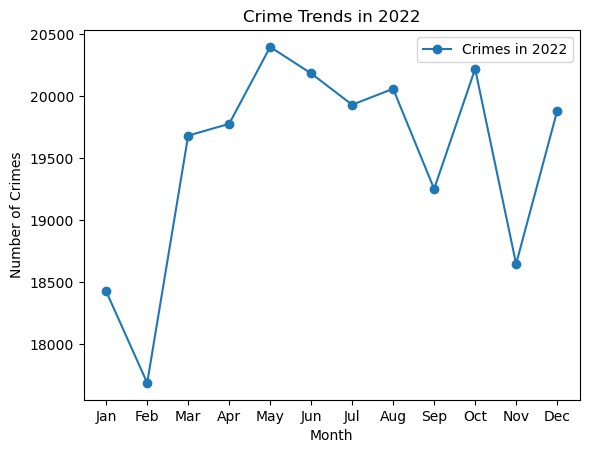

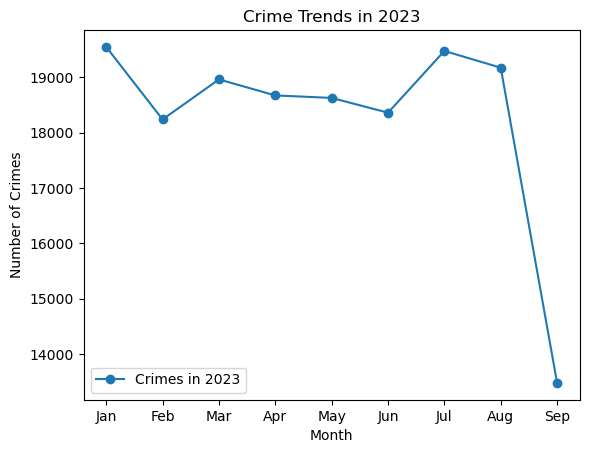

In [14]:
import pandas as pd

# Group the data by year and month, then count the number of crimes for each year and month
yearly_monthly_crime_counts = crime_data.groupby(['Year', 'Month']).size().unstack()

# Create a line chart for each year
for year in yearly_monthly_crime_counts.index:
    monthly_data = yearly_monthly_crime_counts.loc[year]
    # Replace numerical month values with month names
    monthly_data.index = [pd.Timestamp(2000, m, 1).strftime('%b') for m in monthly_data.index]
    
    plt.figure()  
    plt.plot(monthly_data.index, monthly_data.values, marker='o', linestyle='-', label=f'Crimes in {year}')
    plt.title(f'Crime Trends in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Crimes')
    plt.legend()
    
plt.show()  

In [15]:
# Displying month wise crime counts over the years
yearly_monthly_crime_counts

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2020,18473.0,17252.0,16154.0,15674.0,17193.0,17023.0,17109.0,16867.0,15628.0,16479.0,15563.0,15933.0
2021,16525.0,15402.0,16313.0,16045.0,16983.0,17141.0,18653.0,18363.0,18342.0,19285.0,18321.0,17906.0
2022,18424.0,17685.0,19682.0,19777.0,20398.0,20184.0,19931.0,20060.0,19251.0,20221.0,18646.0,19879.0
2023,19548.0,18238.0,18961.0,18672.0,18627.0,18360.0,19475.0,19173.0,13479.0,NaN,NaN,NaN


In [16]:
crime_data.head()

,DR_NO,Date Rptd,Date Time OCC,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,...,Status Desc,Crm Cd 1,LOCATION,LAT,LON,Weapon Used,Year,Month,Year_Month,DayOfWeek
0,10304468,2020-01-08,2020-01-08 22:30:00,Southwest,377,624,BATTERY - SIMPLE ASSAULT,36,F,B,...,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,1,2020-01,Wednesday
1,190101086,2020-01-02,2020-01-01 03:30:00,Central,163,624,BATTERY - SIMPLE ASSAULT,25,M,H,...,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,1,2020-01,Wednesday
2,200110444,2020-04-14,2020-02-13 12:00:00,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,...,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,0,2020,2,2020-02,Thursday
3,191501505,2020-01-01,2020-01-01 17:30:00,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,...,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,0,2020,1,2020-01,Wednesday
4,191921269,2020-01-01,2020-01-01 04:15:00,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,...,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,0,2020,1,2020-01,Wednesday


In [17]:
# Filtering the dataframe based on specific events
us_election = crime_data.loc[(crime_data['Date Time OCC'] >= '2020-10-01') & (crime_data['Date Time OCC'] < '2021-02-28')]

In [18]:
# Calculating value counts for the specific events
us_election['Date Time OCC'] = pd.to_datetime(us_election['Date Time OCC'])
us_election_count = us_election['Date Time OCC'].dt.date.value_counts().sort_index()
us_election_count

2020-10-01    725
2020-10-02    569
2020-10-03    542
2020-10-04    505
2020-10-05    525
             ... 
2021-02-23    541
2021-02-24    531
2021-02-25    541
2021-02-26    619
2021-02-27    577
Name: Date Time OCC, Length: 150, dtype: int64

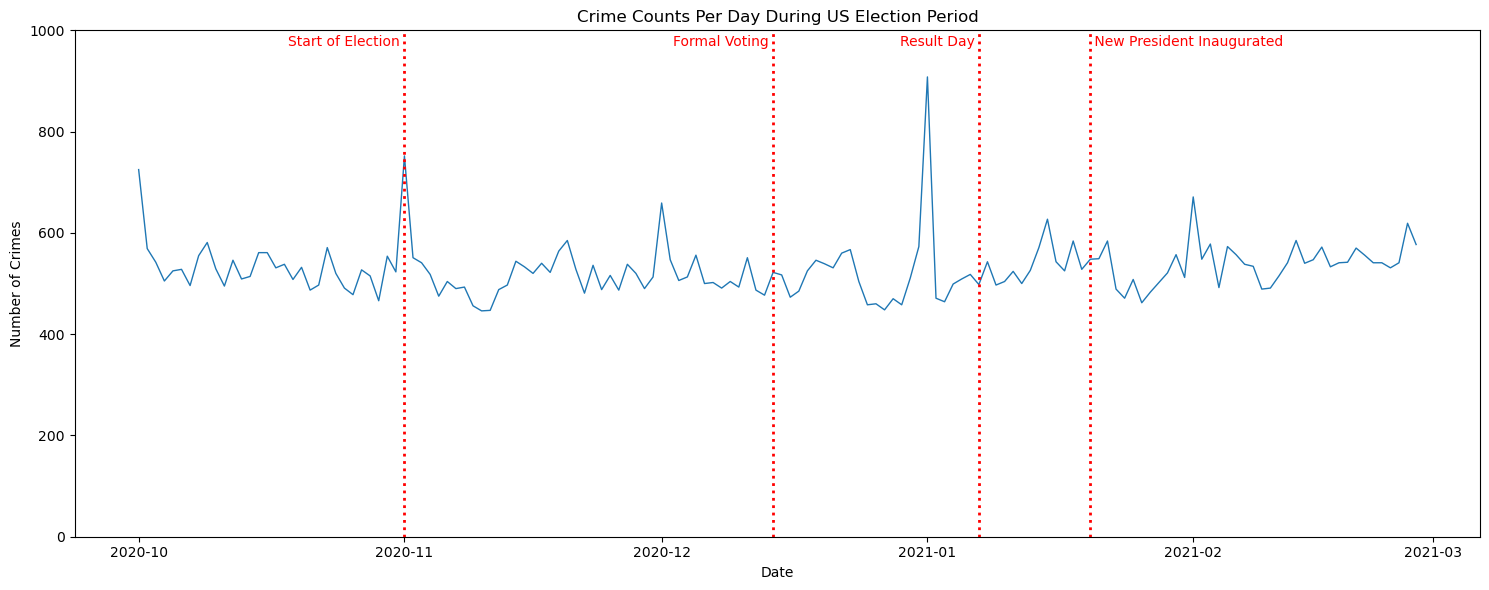

In [19]:
# Plotting the specific events
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(us_election_count, linestyle='-', linewidth=1)

ax.set_title('Crime Counts Per Day During US Election Period')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')

ax.set_ylim(bottom=0, top=1000)

election_start = pd.to_datetime('2020-11-01')
formal_voting = pd.to_datetime('2020-12-14')
result_day = pd.to_datetime('2021-01-07')
inauguration_day = pd.to_datetime('2021-01-20')

ax.axvline(x=election_start, color='red', linestyle=':', linewidth=2)
ax.axvline(x=formal_voting, color='red', linestyle=':', linewidth=2)
ax.axvline(x=result_day, color='red', linestyle=':', linewidth=2)
ax.axvline(x=inauguration_day, color='red', linestyle=':', linewidth=2)

ax.annotate('Start of Election ', xy=(election_start, 950), xytext=(election_start, 970),
             ha='right', color='red')

ax.annotate('Formal Voting ', xy=(formal_voting, 950), xytext=(formal_voting, 970),
             ha='right', color='red')

ax.annotate('Result Day ', xy=(result_day, 950), xytext=(result_day, 970),
             ha='right', color='red')

ax.annotate(' New President Inaugurated', xy=(inauguration_day, 950), xytext=(inauguration_day, 970),
             ha='left', color='red')

plt.tight_layout()
plt.show()

In [20]:
# Filtering the dataframe based on specific events
George_Floyd_Protests = crime_data.loc[(crime_data['Date Time OCC'] >= '2020-04-15') & (crime_data['Date Time OCC'] < '2020-07-30')]

In [21]:
# Calculating value counts for the specific events
George_Floyd_Protests['Date Time OCC'] = pd.to_datetime(George_Floyd_Protests['Date Time OCC'])
George_Floyd_Protests_count = George_Floyd_Protests['Date Time OCC'].dt.date.value_counts().sort_index()
George_Floyd_Protests_count

2020-04-15    525
2020-04-16    542
2020-04-17    548
2020-04-18    520
2020-04-19    518
             ... 
2020-07-25    526
2020-07-26    511
2020-07-27    549
2020-07-28    531
2020-07-29    533
Name: Date Time OCC, Length: 106, dtype: int64

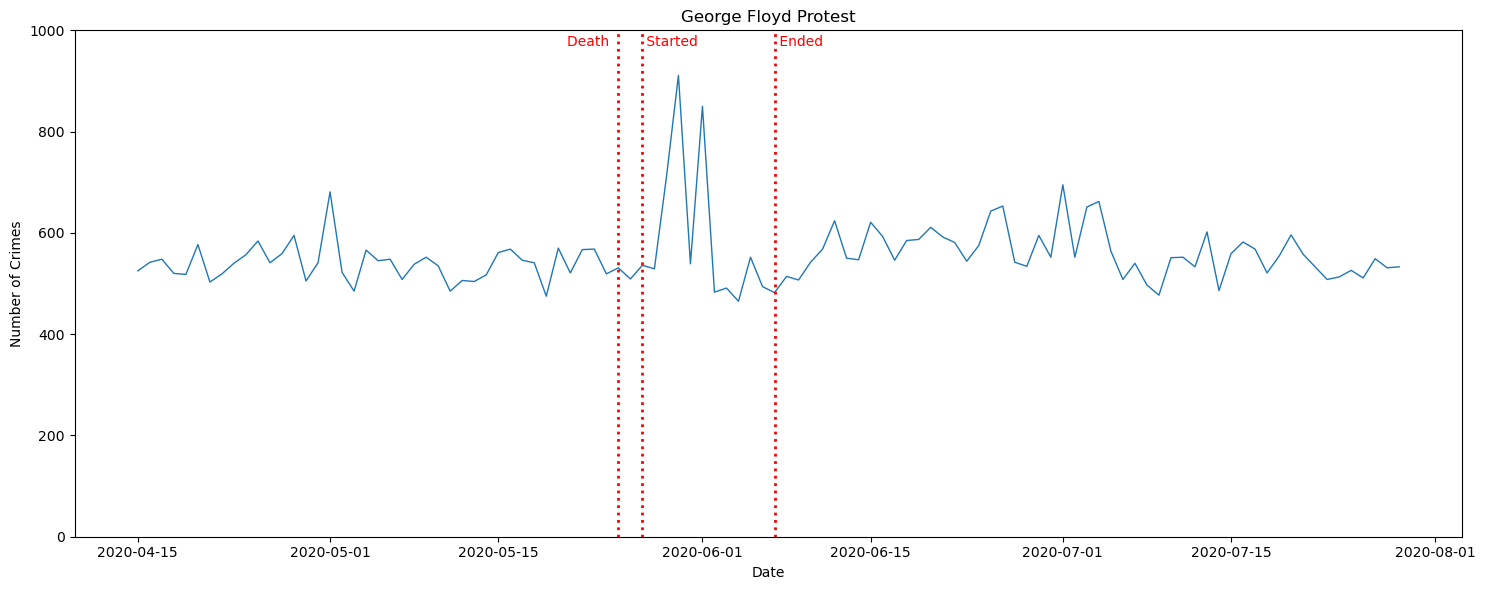

In [22]:
# Plotting the specific events
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(George_Floyd_Protests_count, linestyle='-', linewidth=1)

ax.set_title('George Floyd Protest')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')

ax.set_ylim(bottom=0, top=1000)

Death = pd.to_datetime('2020-05-25')
Protests_started = pd.to_datetime('2020-05-27')
Protests_ended= pd.to_datetime('2020-06-07')


ax.axvline(x=Death, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Protests_started, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Protests_ended, color='red', linestyle=':', linewidth=2)

ax.annotate('Death  ', xy=(Death, 950), xytext=(Death, 970),
             ha='right', color='red')

ax.annotate(' Started ', xy=(Protests_started, 950), xytext=(Protests_started, 970),
             ha='left', color='red')

ax.annotate(' Ended ', xy=(Protests_ended, 950), xytext=(Protests_ended, 970),
             ha='left', color='red')

plt.tight_layout()
plt.show()

In [23]:
# Filtering the dataframe based on specific events
Min_wages = crime_data.loc[(crime_data['Date Time OCC'] >= '2022-04-01') & (crime_data['Date Time OCC'] < '2022-07-30')]

In [24]:
# Calculating value counts for the specific events
Min_wages['Date Time OCC'] = pd.to_datetime(Min_wages['Date Time OCC'])
Min_wages_count = Min_wages['Date Time OCC'].dt.date.value_counts().sort_index()
Min_wages_count

2022-04-01    1018
2022-04-02     874
2022-04-03     825
2022-04-04     697
2022-04-05     634
              ... 
2022-07-25     580
2022-07-26     561
2022-07-27     621
2022-07-28     585
2022-07-29     642
Name: Date Time OCC, Length: 120, dtype: int64

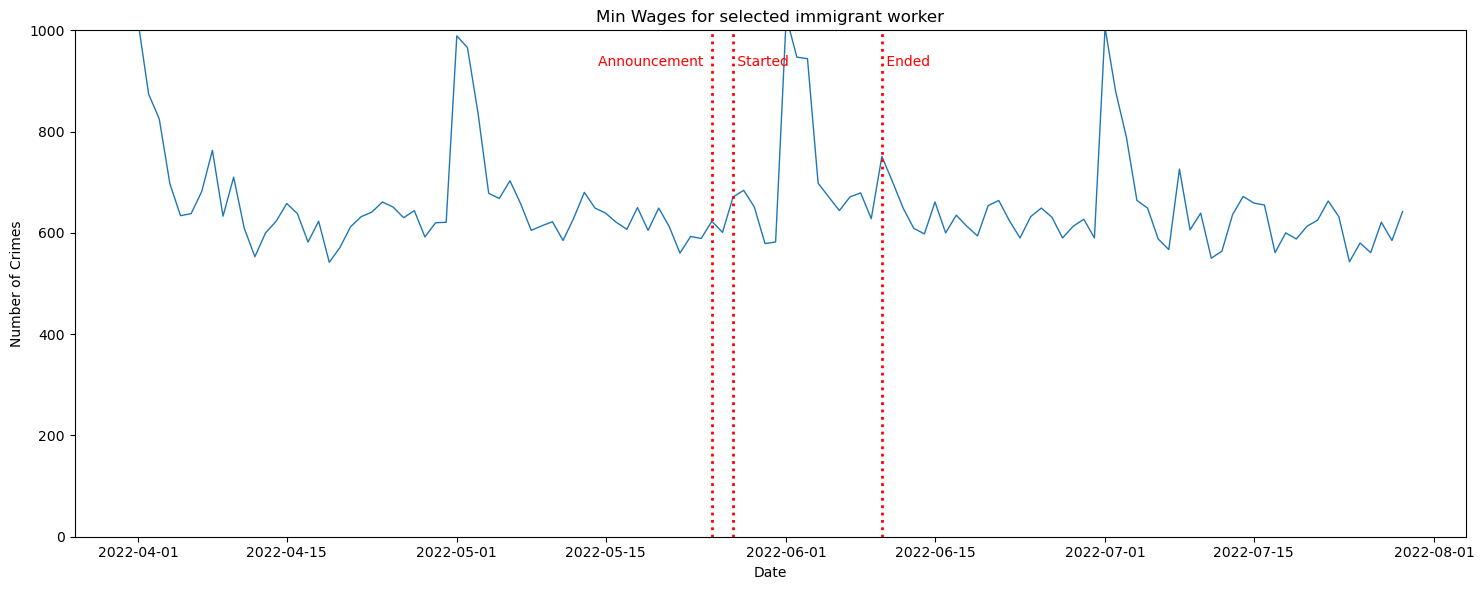

In [25]:
# Plotting the specific events
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(Min_wages_count, linestyle='-', linewidth=1)

ax.set_title('Min Wages for selected immigrant worker')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')

ax.set_ylim(bottom=0, top=1000)

Announcement = pd.to_datetime('2022-05-25')
Protests_started = pd.to_datetime('2022-05-27')
Protests_ended= pd.to_datetime('2022-06-10')


ax.axvline(x=Announcement, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Protests_started, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Protests_ended, color='red', linestyle=':', linewidth=2)

ax.annotate('Announcement  ', xy=(Announcement, 300), xytext=(Announcement, 930),
             ha='right', color='red')

ax.annotate(' Started ', xy=(Protests_started, 930), xytext=(Protests_started, 930),
             ha='left', color='red')

ax.annotate(' Ended ', xy=(Protests_ended, 930), xytext=(Protests_ended, 930),
             ha='left', color='red')

plt.tight_layout()
plt.show()

In [26]:
# Filtering the dataframe based on specific events
Covid = crime_data.loc[(crime_data['Date Time OCC'] >= '2020-01-01') & (crime_data['Date Time OCC'] < '2022-06-01')]

In [27]:
# Calculating value counts for the specific events
Covid['Date Time OCC'] = pd.to_datetime(Covid['Date Time OCC'])
Covid_count = Covid['Date Time OCC'].dt.date.value_counts().sort_index()
Covid_count

2020-01-01    1100
2020-01-02     526
2020-01-03     595
2020-01-04     540
2020-01-05     505
              ... 
2022-05-27     671
2022-05-28     684
2022-05-29     651
2022-05-30     579
2022-05-31     582
Name: Date Time OCC, Length: 882, dtype: int64

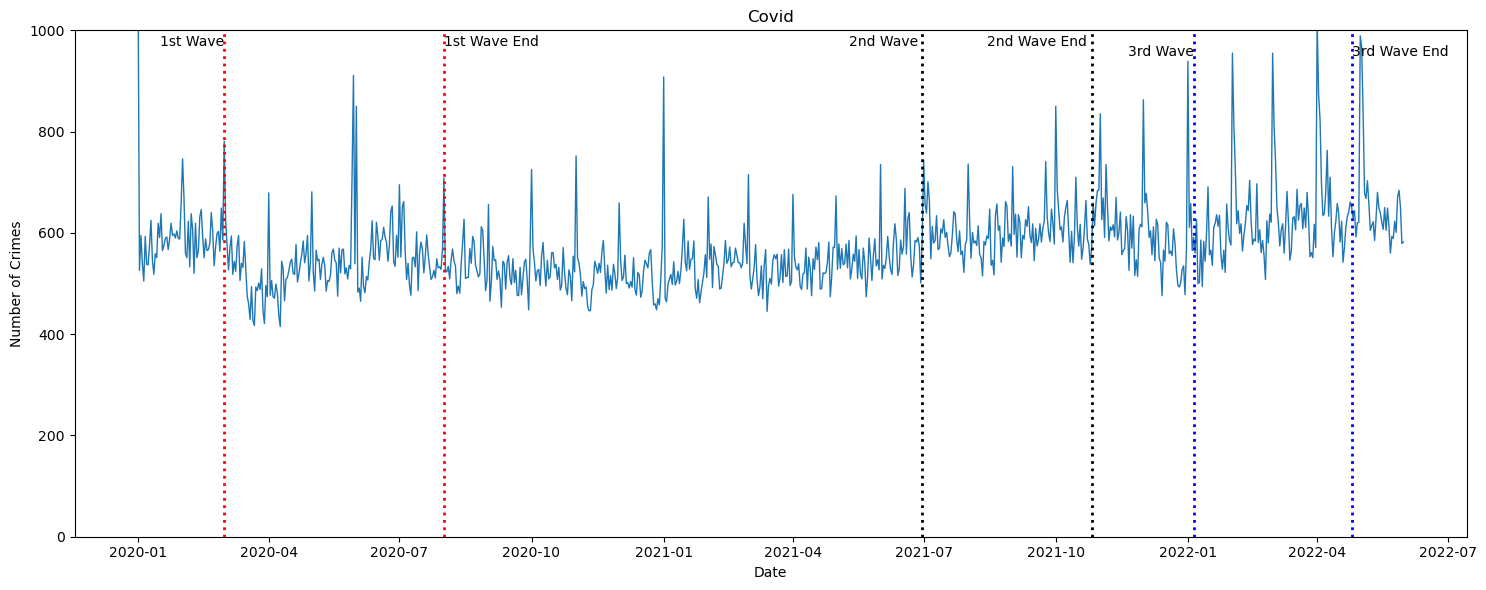

In [28]:
# Plotting the specific events
import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(Covid_count, linestyle='-', linewidth=1)

ax.set_title('Covid')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')

ax.set_ylim(bottom=0, top=1000)

First_wave = pd.to_datetime('2020-03-01')
FirstWave_ended = pd.to_datetime('2020-08-01')
Second_wave= pd.to_datetime('2021-06-30')
Secondwave_ended= pd.to_datetime('2021-10-26')
Third_wave= pd.to_datetime('2022-01-05')
Thirdwave_ended= pd.to_datetime('2022-04-25')


ax.axvline(x=First_wave, color='red', linestyle=':', linewidth=2)
ax.axvline(x=FirstWave_ended, color='red', linestyle=':', linewidth=2)
ax.axvline(x=Second_wave, color='black', linestyle=':', linewidth=2)
ax.axvline(x=Secondwave_ended, color='black', linestyle=':', linewidth=2)
ax.axvline(x=Third_wave, color='blue', linestyle=':', linewidth=2)
ax.axvline(x=Thirdwave_ended, color='blue', linestyle=':', linewidth=2)

ax.annotate('1st Wave', xy=(First_wave, 950), xytext=(First_wave, 970),
             ha='right', color='black')

ax.annotate('1st Wave End', xy=(FirstWave_ended, 950), xytext=(FirstWave_ended, 970),
             ha='left', color='black')

ax.annotate('2nd Wave ', xy=(Second_wave, 950), xytext=(Second_wave, 970),
             ha='right', color='black')
ax.annotate('2nd Wave End ', xy=(Secondwave_ended, 950), xytext=(Secondwave_ended, 970),
             ha='right', color='black')

ax.annotate('3rd Wave', xy=(Third_wave, 950), xytext=(Third_wave, 950),
             ha='right', color='black')

ax.annotate('3rd Wave End', xy=(Thirdwave_ended, 950), xytext=(Thirdwave_ended, 950),
             ha='left', color='black')

plt.tight_layout()
plt.show()

### Outliers and Anomalies

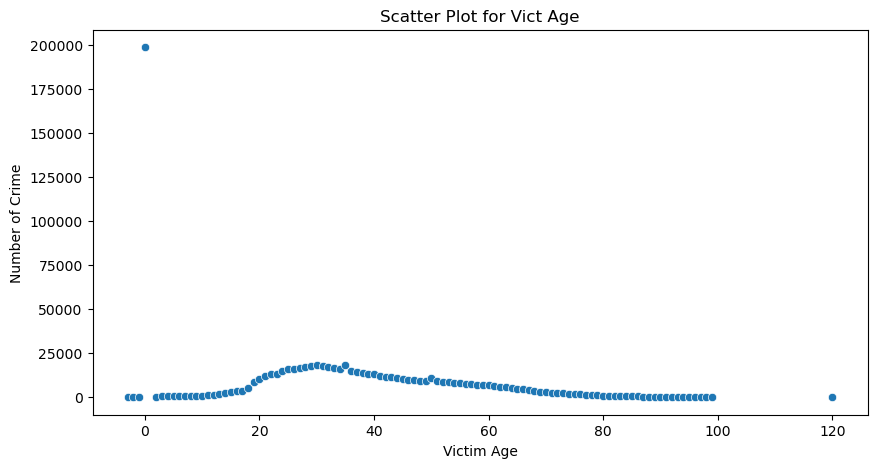

In [29]:
#Scatter Plot for Vict Age
age_wise = data_crime.groupby('Vict Age')['Crm Cd'].count()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=age_wise.index, y=age_wise.values)
plt.title('Scatter Plot for Vict Age')
plt.xlabel('Victim Age')
plt.ylabel('Number of Crime')
plt.show()

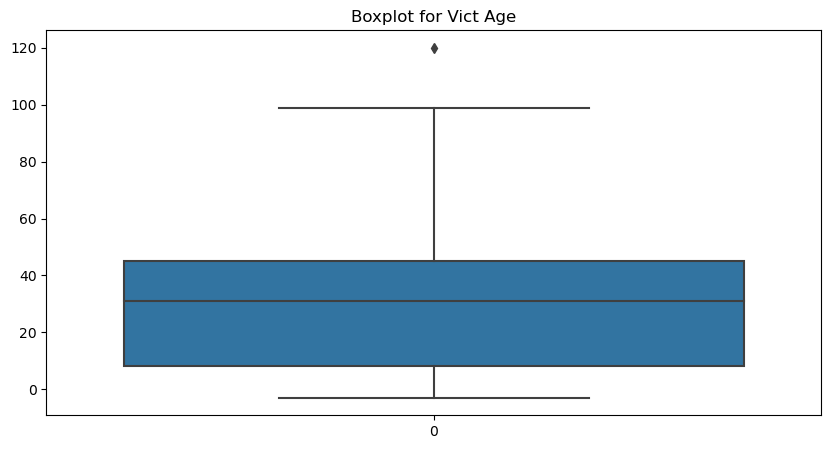

In [30]:
#Boxplot for Vict Age
plt.figure(figsize=(10, 5))
sns.boxplot(data_crime['Vict Age'])
plt.title('Boxplot for Vict Age')
plt.show()

### Demographic Factors

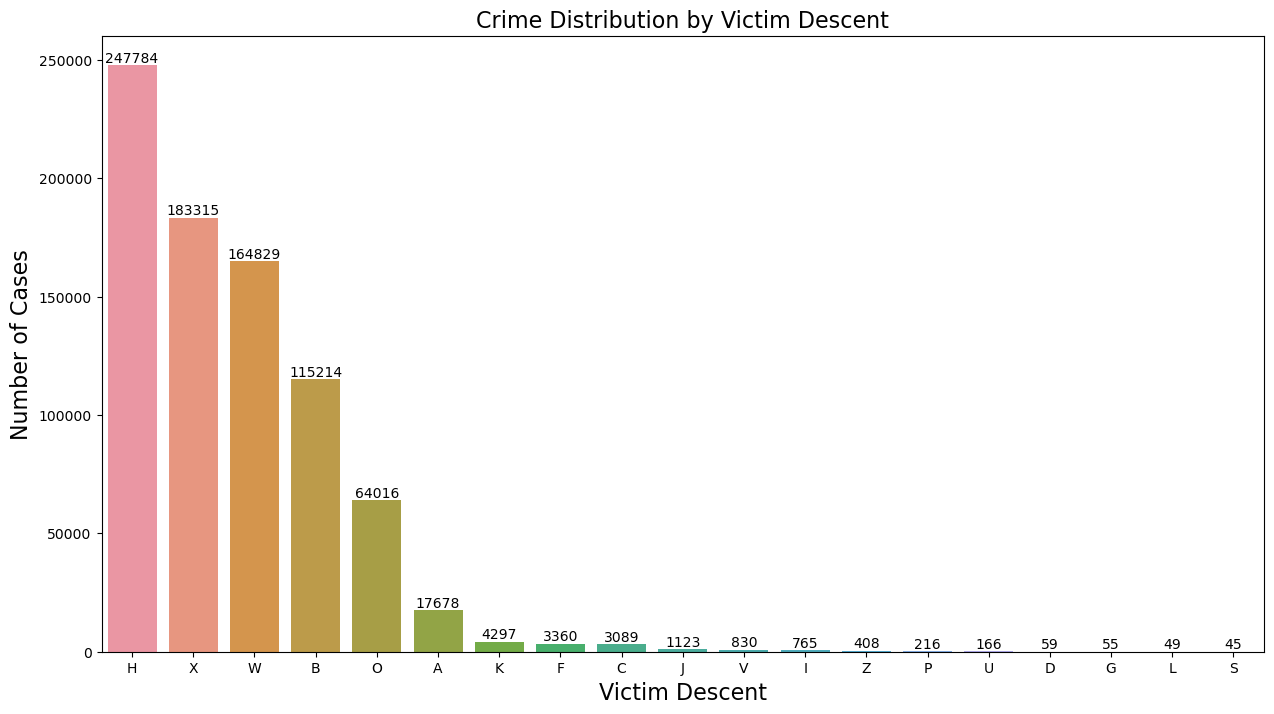

In [31]:
# Plotting Crime distribution by Victim Descent
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Vict Descent', data=crime_data, order=crime_data['Vict Descent'].value_counts().index)
plt.title('Crime Distribution by Victim Descent', fontsize = 16)
plt.ylabel('Number of Cases', fontsize = 16)
plt.xlabel('Victim Descent',fontsize = 16)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

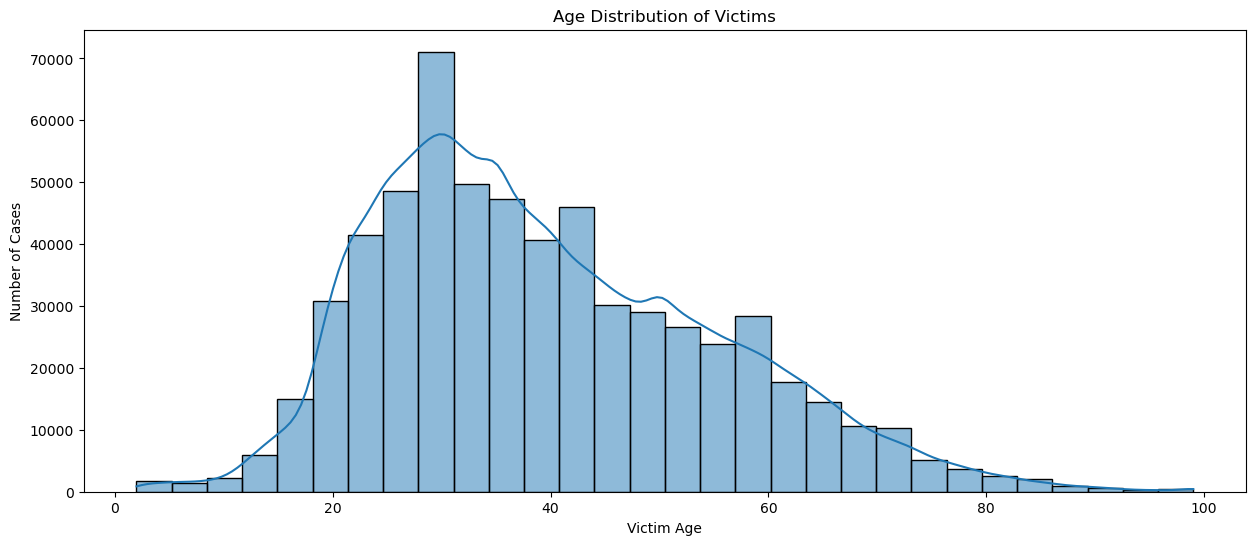

In [32]:
# Plotting age distribution of Victims
vict_age_data = crime_data[crime_data['Vict Age'].between(1,100)]

plt.figure(figsize=(15, 6))
ax = sns.histplot(vict_age_data['Vict Age'], bins=30, kde=True)
plt.title('Age Distribution of Victims')
plt.ylabel('Number of Cases')
plt.xlabel('Victim Age')
plt.show()

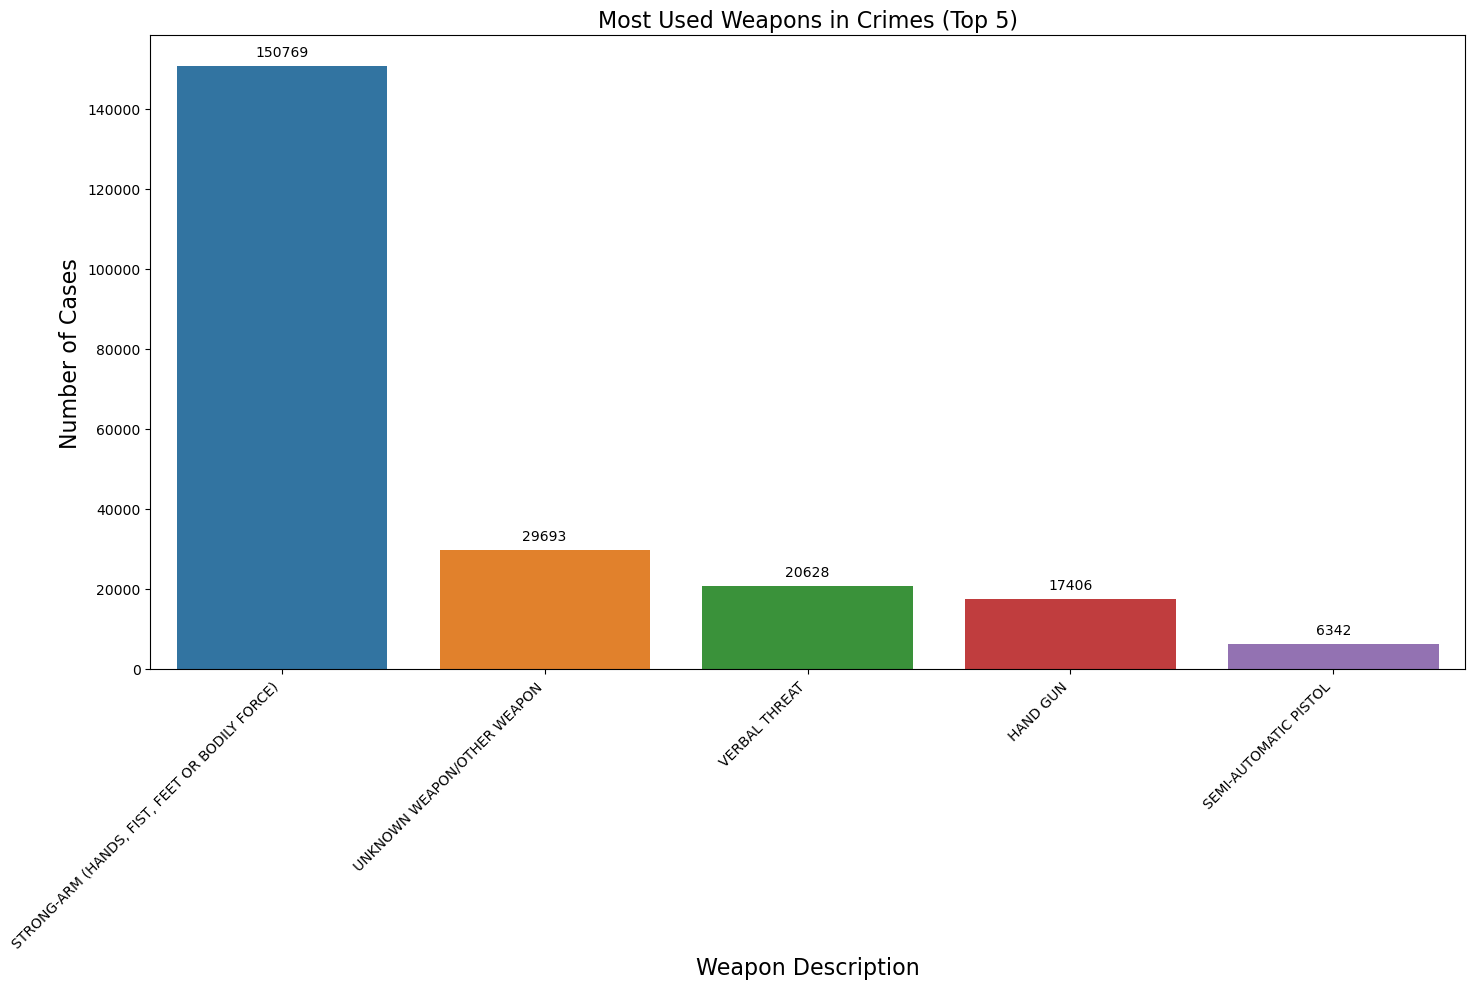

In [33]:
# Plotting most used Weapons in Crimes
plt.figure(figsize=(15, 10))
top_5_weapons = data_crime['Weapon Desc'].value_counts().index[:5]
ax = sns.countplot(x='Weapon Desc', data=data_crime, order=top_5_weapons)
plt.title('Most Used Weapons in Crimes (Top 5)', fontsize = 16)
plt.xlabel('Weapon Description', fontsize = 16)
plt.ylabel('Number of Cases', fontsize = 16)

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

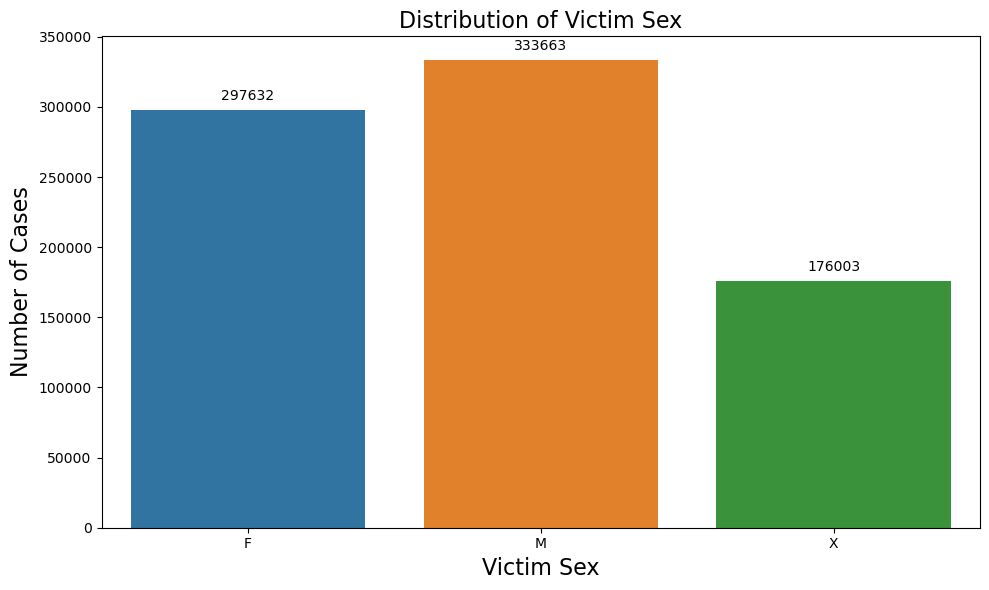

In [34]:
# Plotting Distribution of Victim Sex
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Vict Sex', data =crime_data)
plt.title('Distribution of Victim Sex',fontsize = 16)
plt.xlabel('Victim Sex',fontsize = 16)
plt.ylabel('Number of Cases',fontsize = 16)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()